# ITS307 Data Analytics : Autumn Semester 2022
# ClassWork 

# Supervised Learning 


# Table of Contents 
<ol start="0">
<li> Learning Objectives </li>
<li> Importing Libraries </li>
<li> Loading and Cleaning with Pandas</li>
<li> EDA  </li>
<li> Feature Engineering  </li>
<li> Training Model</li>
<li> Predicting</li>
<li> Evaluating Model</li>

</ol>

# Learning Objectives

Second-hand car have huge market base. Many consider to buy a Used Car intsead of buying of new one, as it's is feasible and a better investment.

The dataset shared contains some of the features that determines the second hand car's price in India. Some of the features of are:
- Name: The brand and model of the car
- Location: The location in which the car is being sold or is available for purchase.
- Year: Year or edition of the model
- Kilometers_Driven: The total kilometres driven in the car by the previous owner(s) in KM
- Fuel_Type: The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG)
- Transmission: The type of transmission used by the car. (Automatic / Manual)
- Owner_Type: Whether the owner is first owner or second owner and so on.
- Mileage: The standard mileage offered by the car company in kmpl or km/kg
- Engine: The displacement volume of the engine in CC.
- Power:
- Seat: Number of the seat of car
- New_Price: Price of the car when its new/first hand
- Price (Target) : Price of the used car


# 1. Loading Libraries

In [79]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

In [80]:
df=pd.read_csv('train-data.csv')
dft=pd.read_csv('test-data.csv')

# 2. Loading and Cleaning with Pandas

In [81]:
# loading train-data
df.head()

Unnamed: 0                              Name    Location  Year  \
0           0            Maruti Wagon R LXI CNG      Mumbai  2010   
1           1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015   
2           2                      Honda Jazz V     Chennai  2011   
3           3                 Maruti Ertiga VDI     Chennai  2012   
4           4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013   

   Kilometers_Driven Fuel_Type Transmission Owner_Type     Mileage   Engine  \
0              72000       CNG       Manual      First  26.6 km/kg   998 CC   
1              41000    Diesel       Manual      First  19.67 kmpl  1582 CC   
2              46000    Petrol       Manual      First   18.2 kmpl  1199 CC   
3              87000    Diesel       Manual      First  20.77 kmpl  1248 CC   
4              40670    Diesel    Automatic     Second   15.2 kmpl  1968 CC   

       Power  Seats  New_Price  Price  
0  58.16 bhp    5.0        NaN   1.75  
1  126.2 bhp    5.0        NaN  12.50  
2   88.7 bhp    5.0  8.61 Lakh   4.50  
3  88.76 bhp    7.0        NaN   6.00  
4  140.8 bhp    5.0        NaN  17.74

In [82]:
# loading test-data
dft.head()

Unnamed: 0                                       Name    Location  Year  \
0           0                    Maruti Alto K10 LXI CNG       Delhi  2014   
1           1              Maruti Alto 800 2016-2019 LXI  Coimbatore  2013   
2           2  Toyota Innova Crysta Touring Sport 2.4 MT      Mumbai  2017   
3           3                       Toyota Etios Liva GD   Hyderabad  2012   
4           4                          Hyundai i20 Magna      Mumbai  2014   

   Kilometers_Driven Fuel_Type Transmission Owner_Type      Mileage   Engine  \
0              40929       CNG       Manual      First  32.26 km/kg   998 CC   
1              54493    Petrol       Manual     Second    24.7 kmpl   796 CC   
2              34000    Diesel       Manual      First   13.68 kmpl  2393 CC   
3             139000    Diesel       Manual      First   23.59 kmpl  1364 CC   
4              29000    Petrol       Manual      First    18.5 kmpl  1197 CC   

       Power  Seats   New_Price  
0   58.2 bhp    4.0         NaN  
1   47.3 bhp    5.0         NaN  
2  147.8 bhp    7.0  25.27 Lakh  
3   null bhp    5.0         NaN  
4  82.85 bhp    5.0         NaN

In [83]:
# imputing the numerical features of train-data (df)

numericdf = df.select_dtypes(include = 'number')
impute = SimpleImputer(strategy='mean')
ndf = impute.fit_transform(numericdf)
ndf = pd.DataFrame(data = ndf, columns = numericdf.columns)
ndf.isna().sum()

Unnamed: 0           0
Year                 0
Kilometers_Driven    0
Seats                0
Price                0
dtype: int64

In [84]:
ndf.head()

Unnamed: 0    Year  Kilometers_Driven  Seats  Price
0         0.0  2010.0            72000.0    5.0   1.75
1         1.0  2015.0            41000.0    5.0  12.50
2         2.0  2011.0            46000.0    5.0   4.50
3         3.0  2012.0            87000.0    7.0   6.00
4         4.0  2013.0            40670.0    5.0  17.74

In [85]:
# dropping the unwanted feature
ndf.drop(['Unnamed: 0'],axis=1).head()

Year  Kilometers_Driven  Seats  Price
0  2010.0            72000.0    5.0   1.75
1  2015.0            41000.0    5.0  12.50
2  2011.0            46000.0    5.0   4.50
3  2012.0            87000.0    7.0   6.00
4  2013.0            40670.0    5.0  17.74

In [86]:
q1 = ndf.Price.quantile(0.25)
q3 = ndf.Price.quantile(0.75)
iqr = q3 - q1
upperlimit = q3 + (iqr*1.5)
lowerlimit = q1 - (iqr*1.5)

In [87]:
# detecting the outliers
df1 = ndf[(ndf.Price>lowerlimit) & (ndf.Price<upperlimit)]
df1.shape

(5301, 5)

In [88]:
df2 = ndf[(ndf.Price>upperlimit) | (ndf.Price<lowerlimit)]
df2.shape

(718, 5)

In [89]:
std = ndf.Price.std()
mean = ndf.Price.mean()
upperlimit = mean + (3*std)
lowerlimit = mean - (3*std)
df2 = ndf[(ndf.Price>lowerlimit) & (ndf.Price<upperlimit)]
df2.index


Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            6009, 6010, 6011, 6012, 6013, 6014, 6015, 6016, 6017, 6018],
           dtype='int64', length=5870)

# 3.  EDA and Visualization

C:\Users\Lab-1\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


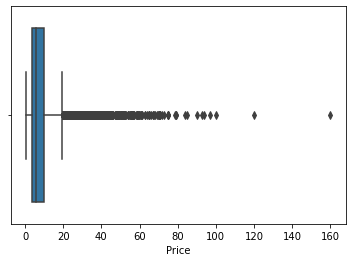

In [90]:
# detecting outliers of x
x = ndf["Price"]
sns.boxplot(x)
plt.show()

C:\Users\Lab-1\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


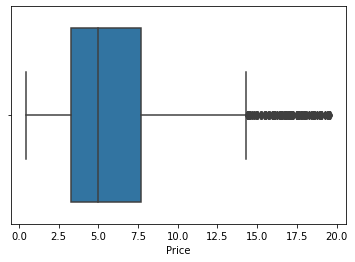

In [91]:
# after removing the outliers of x
x = df1["Price"]
sns.boxplot(x)
plt.show()

C:\Users\Lab-1\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


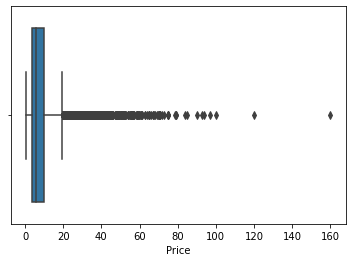

In [92]:
# detecting outliers of y
y = ndf["Price"]
sns.boxplot(y)
plt.show()

C:\Users\Lab-1\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


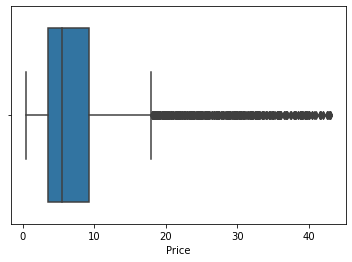

In [93]:
# after removing the outliers of y
y = df2["Price"]
sns.boxplot(y)
plt.show()

# 4. Feature Engineering 

In [94]:
ndf.dtypes

Unnamed: 0           float64
Year                 float64
Kilometers_Driven    float64
Seats                float64
Price                float64
dtype: object

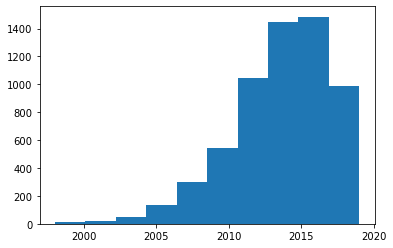

In [96]:
plt.hist(x=ndf.Year)
plt.show()

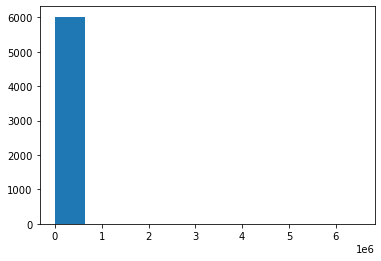

In [97]:
plt.hist(x=ndf.Kilometers_Driven)
plt.show()

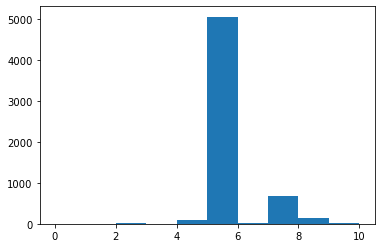

In [98]:
plt.hist(x=ndf.Seats)
plt.show()

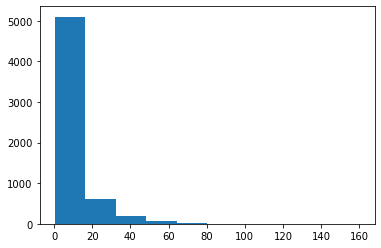

In [99]:
plt.hist(x=ndf.Price)
plt.show()

# 5. Training Model

In [102]:
from sklearn.model_selection import train_test_split

# Before splitting the data, lets choose any one feature as X
X=pd.data
y=pd.target

#Split the data into training and testing sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=5)

AttributeError: module 'pandas' has no attribute 'data'

# 6. Prediction

# 7. Evaluating your Model